# Rastogi, Akash
# 1001-408-667
# 2017-04-12
# Assignment_04_01

In [1]:
import os
import cv2
import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

num_of_imgs = 25
num_of_test_imgs = 32

training_labels = ["" for x in range(num_of_imgs)]
testing_labels = ["" for x in range(num_of_test_imgs)]

train_images_matrix = np.zeros(shape=(num_of_imgs, 180625))  # 25 images of 425X425
test_images_matrix = np.zeros(shape=(num_of_test_imgs, 180625))

mean_face = np.zeros(180625)
mean_adjusted_images = np.zeros(shape=(num_of_imgs,180625))

# method to load images from provided path
def load_images(input_path, matrix, n):
    i = 0
    for filename in os.listdir(input_path):
        # read image
        if filename.endswith(".jpg") and i<n:
            path = input_path + "/" + filename
            image = np.asarray(cv2.imread(path, 0)) / 255.
            matrix[i] = image.ravel()

            if n == num_of_imgs:
                training_labels[i] = filename.split('_')[0]
            elif n == num_of_test_imgs:
                testing_labels[i] = filename.split('_')[0]
            i += 1
    return matrix

# method to display images in a 5X5 grid
def display_images(images_to_plot):
    fig = plt.figure(1, (10., 10.))

    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(5, 5),  # creates 2x2 grid of axes
                     axes_pad=0.05,  # pad between axes in inch.
                     )

    for i in range(num_of_imgs):
        image = images_to_plot[i].reshape(425, 425)
        image = imresize(image, size=[100,100])

        grid[i].imshow(image, cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        grid[i].get_xaxis().set_visible(False)
        grid[i].get_yaxis().set_visible(False)
    plt.show()

# method to display images in pairs
def display_images_pairs(images_set1, images_set2, non_faces_indices):

    for i in range(num_of_test_imgs):
        fig = plt.figure(1, (10., 10.))

        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                         nrows_ncols=(1, 2),  # creates 2x2 grid of axes
                         axes_pad=0.05,  # pad between axes in inch.
                         )

        img1 = images_set1[i].reshape(425, 425)
        img2 = images_set2[i].reshape(425, 425)

        img1 = imresize(img1, size=[100, 100])
        img2 = imresize(img2, size=[100, 100])

        grid[0].imshow(img1, cmap='Greys_r') # The AxesGrid object work as a list of axes.
        grid[0].get_xaxis().set_visible(False)
        grid[0].get_yaxis().set_visible(False)
        if i in non_faces_indices:
            img2 = np.zeros(shape=(100, 100), dtype='uint8')
        grid[1].imshow(img2, cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        grid[1].get_xaxis().set_visible(False)
        grid[1].get_yaxis().set_visible(False)

        plt.show()

# Task 1

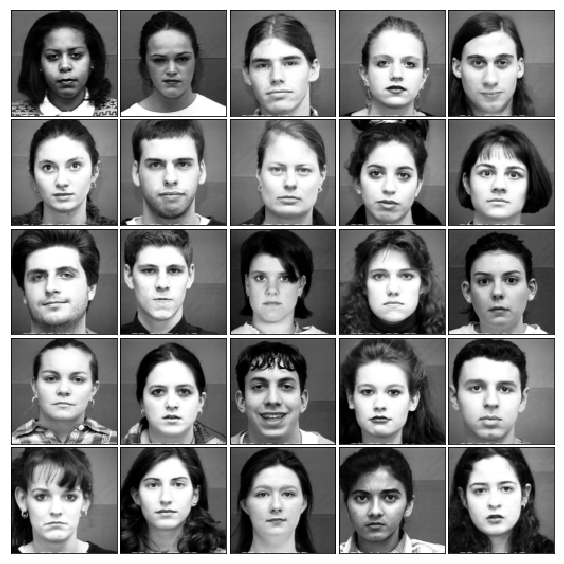

In [2]:
# Read and display train images in 5X5 grid

path_to_train = os.getcwd() + "/Eigenfaces/Train"
path_to_test = os.getcwd() + "/Eigenfaces/Test"

train_images_matrix = load_images(path_to_train, train_images_matrix, num_of_imgs)
display_images(train_images_matrix)

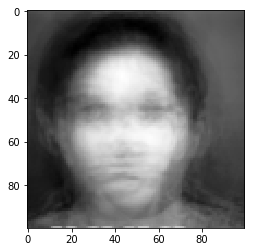

In [3]:
# Calculate and display mean face image

mean_face = np.mean(train_images_matrix, axis=0)
mean_face_reshaped = mean_face.reshape(425, 425)
mean_face_resized = imresize(mean_face_reshaped, size=[100,100])
plt.imshow(mean_face_resized, cmap='Greys_r')
plt.show()

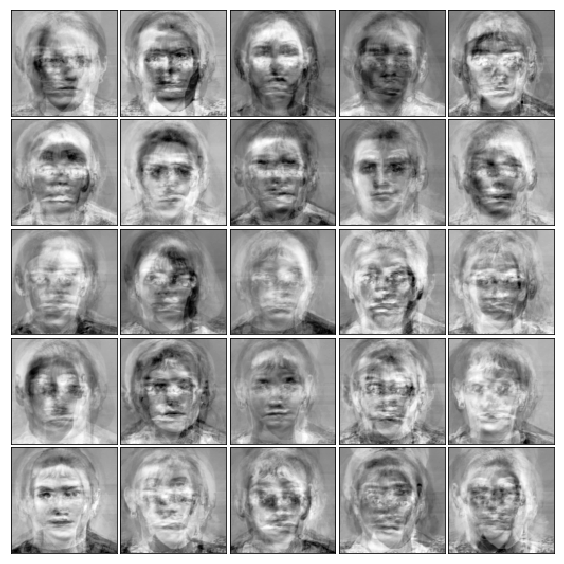

In [4]:
# Calculate and display all 25 Eigen Faces

mean_adjusted_images = (train_images_matrix - mean_face)
covariance = np.cov(mean_adjusted_images)

# calculate eigenvectors & eigenvalues of the covariance matrix
evals, evecs = np.linalg.eig(covariance)

eigen_faces = np.dot(evecs, mean_adjusted_images)
display_images(eigen_faces)

# Task 2

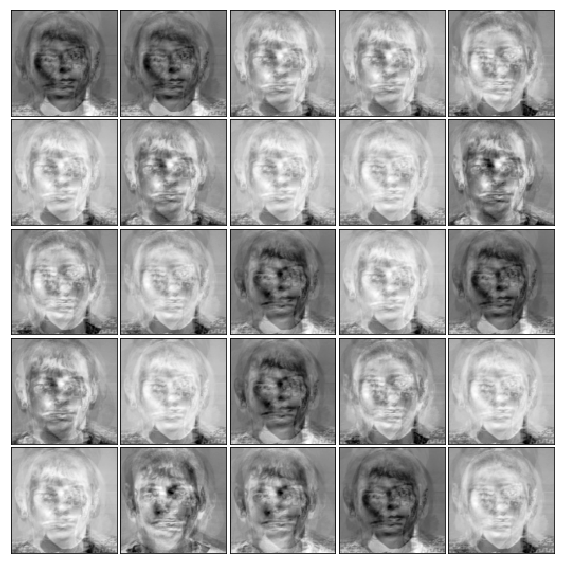

In [12]:
# Reconstructing faces from top 2 eigen vectors

idx = np.argsort(evals)[::-1]
evecs = evecs[:, idx]

# sort eigenvectors according to same index
evals = evals[idx]

k = 2

eigen_faces = np.dot(evecs[0:k], mean_adjusted_images)
weights = np.dot(mean_adjusted_images, eigen_faces.T)

reconstructed = mean_face + np.dot(weights, eigen_faces)
display_images(reconstructed)

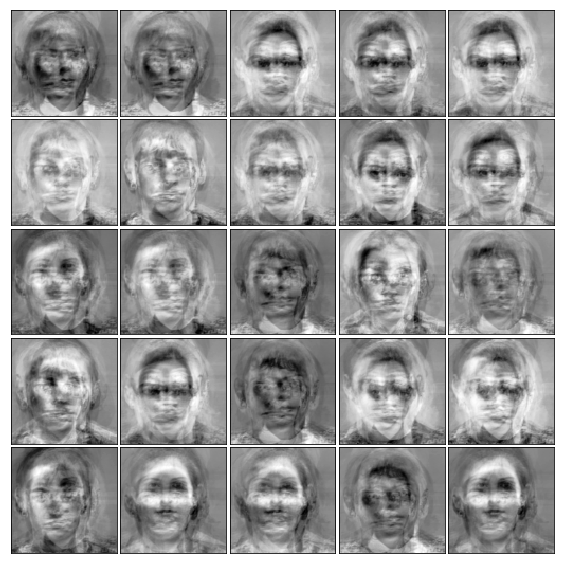

In [6]:
# Reconstructing faces from top 5 eigen vectors

k = 5

eigen_faces = np.dot(evecs[0:k], mean_adjusted_images)
weights = np.dot(mean_adjusted_images, eigen_faces.T)

reconstructed =  mean_face + np.dot(weights, eigen_faces)
display_images(reconstructed)

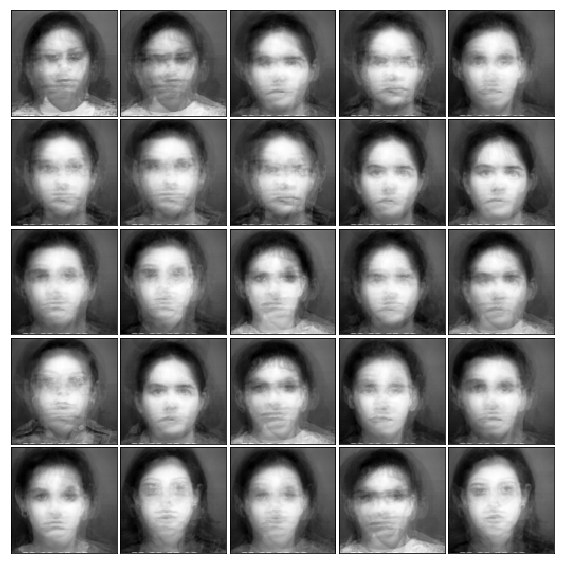

In [41]:
# Reconstructing faces from top 15 eigen vectors

k = 25

eigen_faces = np.dot(evecs[0:k], mean_adjusted_images)/255.
weights = np.dot(mean_adjusted_images, eigen_faces.T)

reconstructed =  mean_face + np.dot(weights, eigen_faces)
display_images(reconstructed)

# Task 3

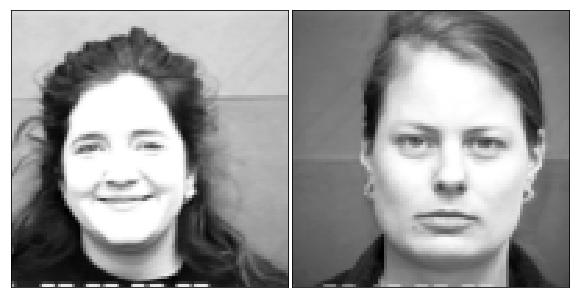

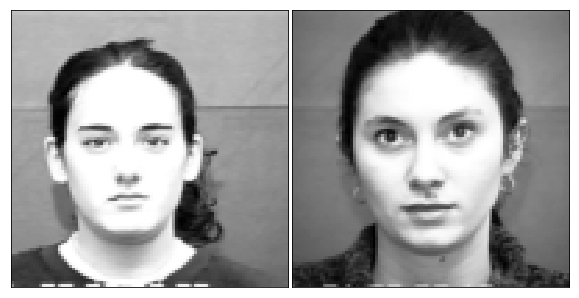

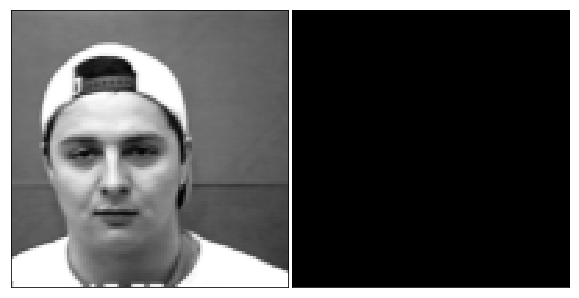

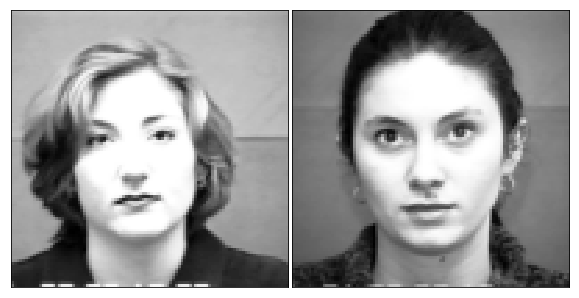

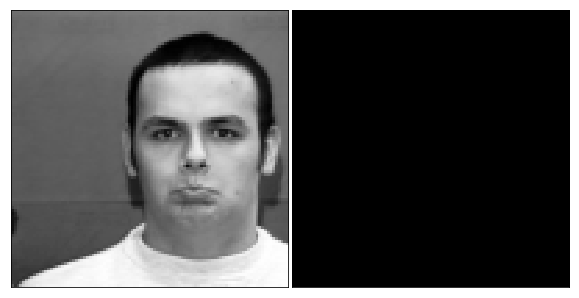

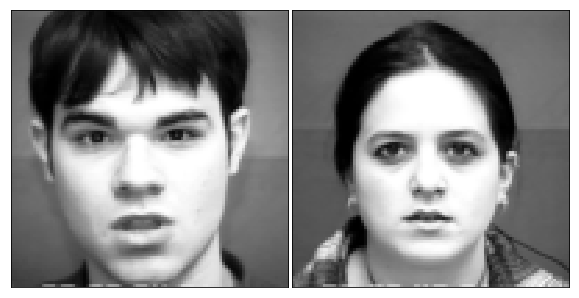

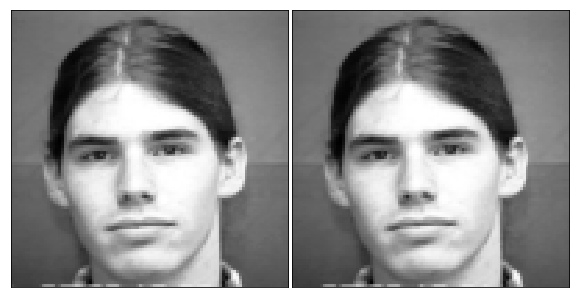

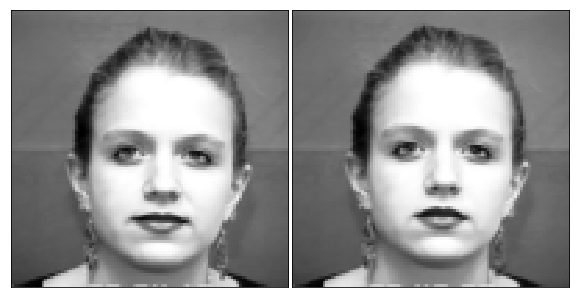

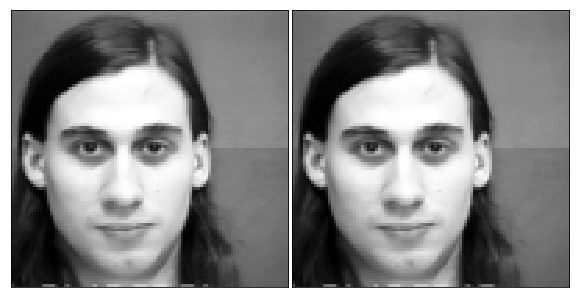

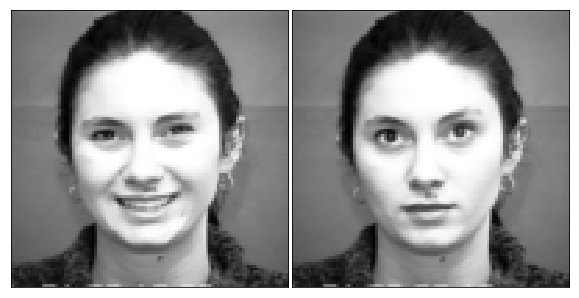

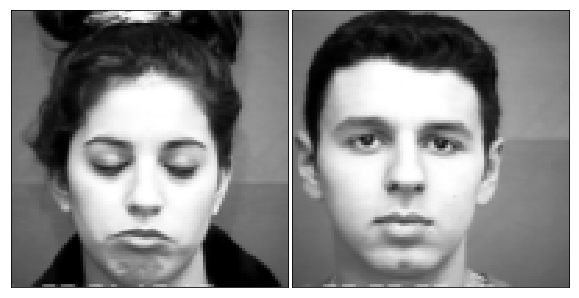

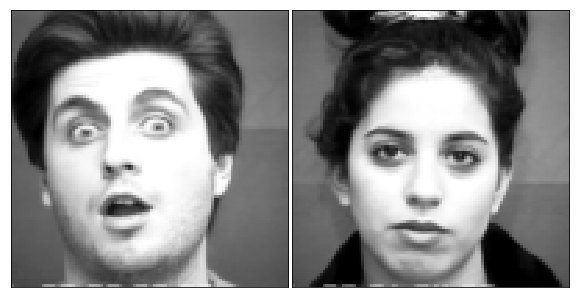

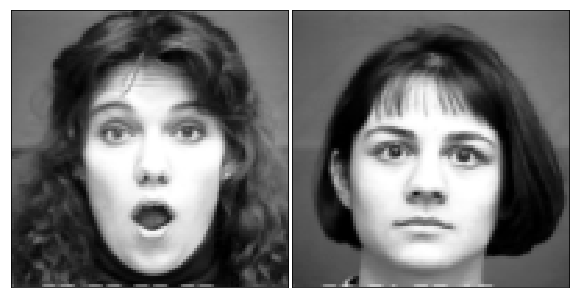

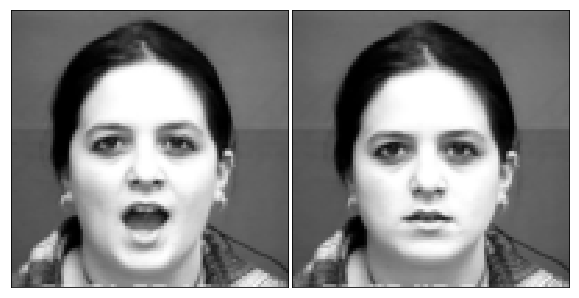

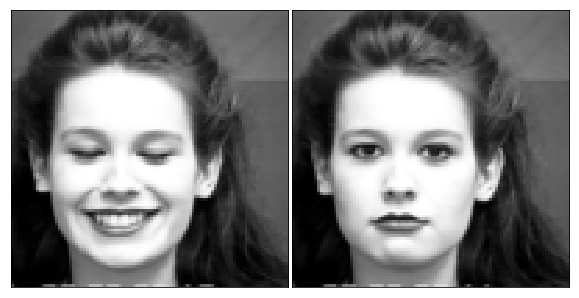

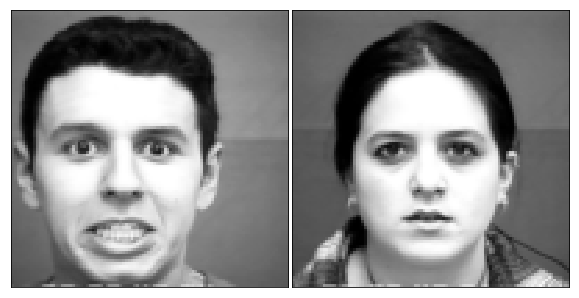

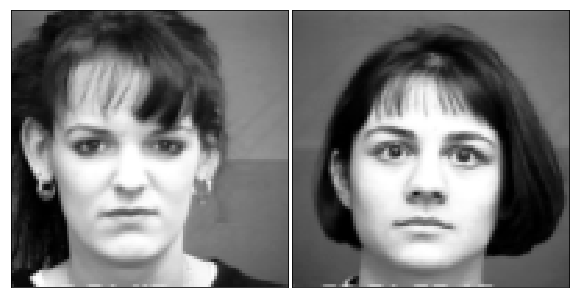

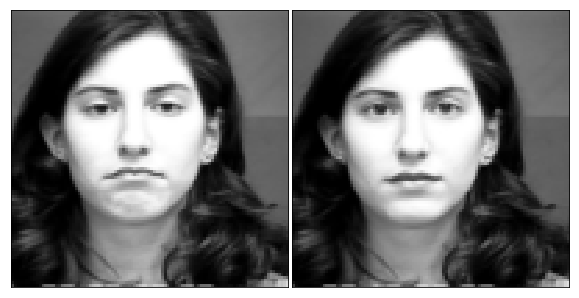

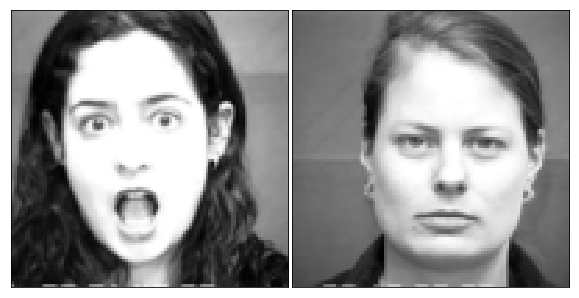

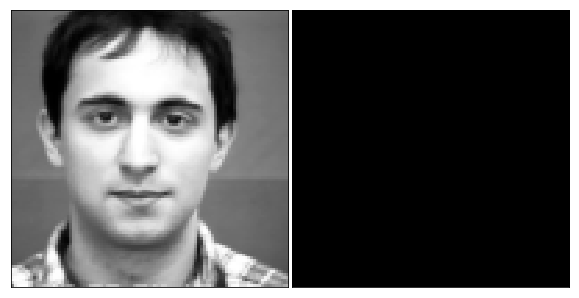

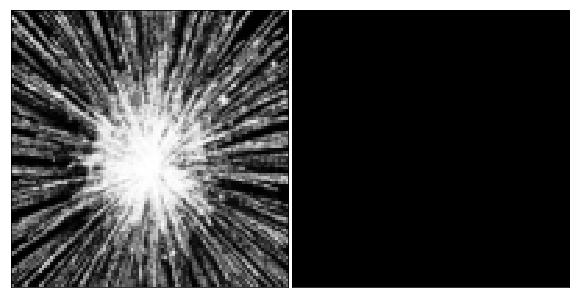

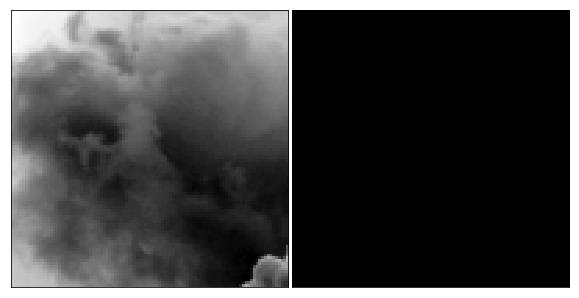

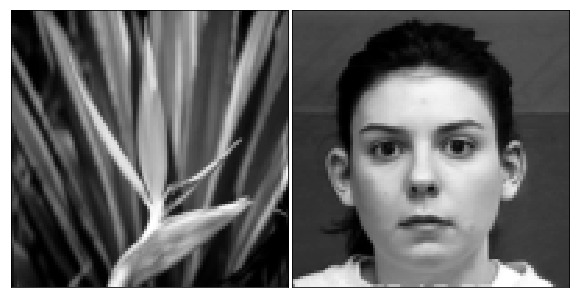

In [14]:
# Loading Test images. Finding closest training image using top 2 eigen vectors

k = 2

eigen_faces = np.dot(evecs[0:k], mean_adjusted_images)
weights = np.dot(mean_adjusted_images, eigen_faces.T)

test_images_matrix = load_images(path_to_test, test_images_matrix, num_of_test_imgs)
mean_adjusted_test_imgs = test_images_matrix - mean_face
new_weights = np.dot(mean_adjusted_test_imgs, eigen_faces.T)

threshold = 1000

min_distance_indices = np.zeros(num_of_test_imgs, dtype='uint8')
non_faces_indices = []
for j in range(len(new_weights)):
    new_w = new_weights[j]
    distances = np.zeros(num_of_imgs)
    for i in range(len(weights)):
        old_w = weights[i]
        distances[i] = np.sqrt(np.sum(np.square(new_w-old_w)))

    min_index = np.argmin(distances)

    min_distance_indices[j] = min_index
    if distances[min_index] > threshold:
        non_faces_indices.append(j)
display_images_pairs(test_images_matrix, train_images_matrix[min_distance_indices], non_faces_indices)

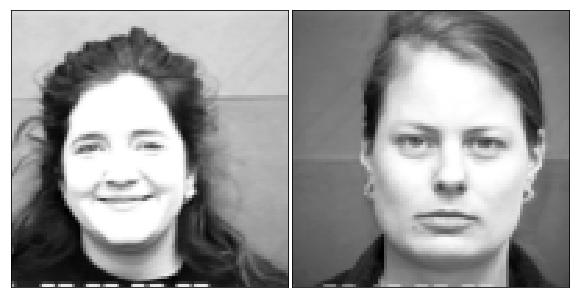

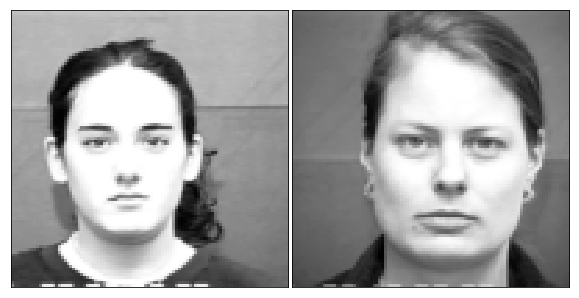

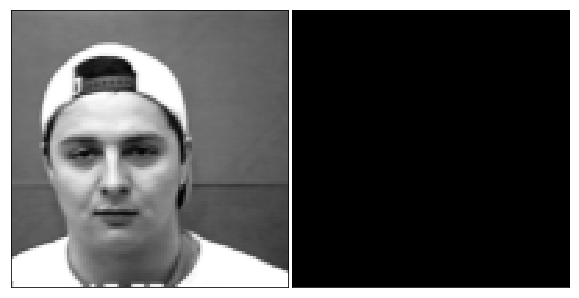

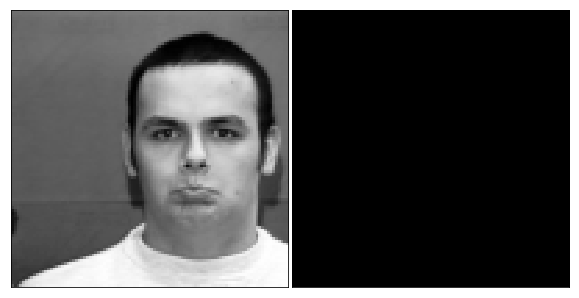

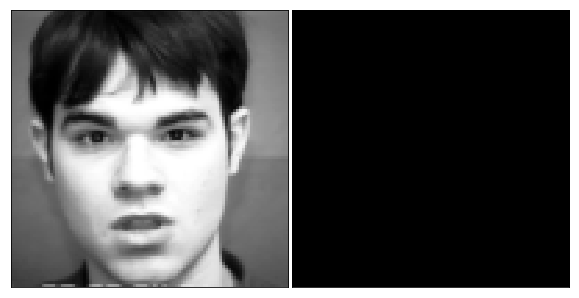

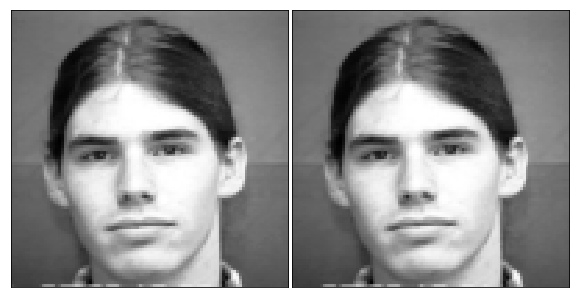

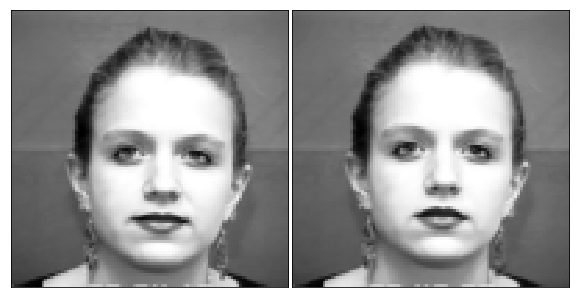

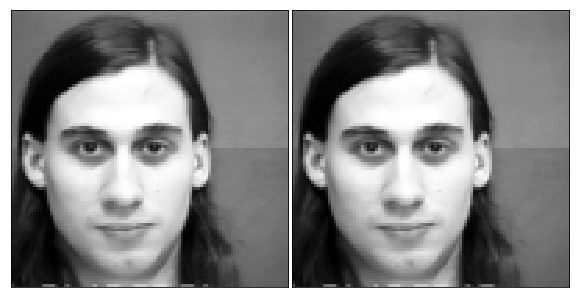

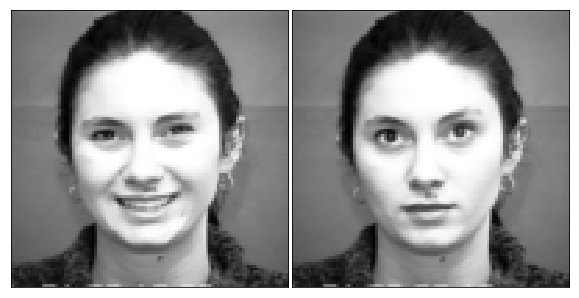

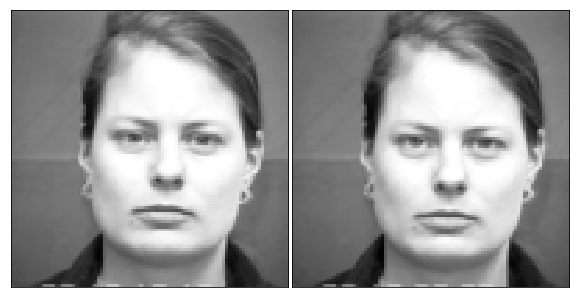

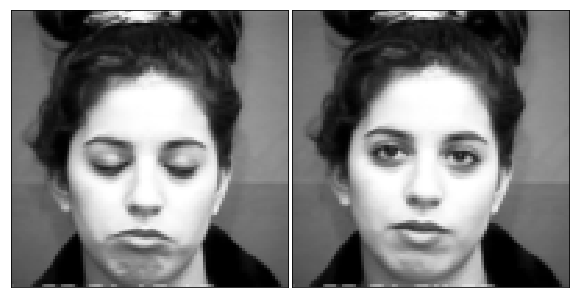

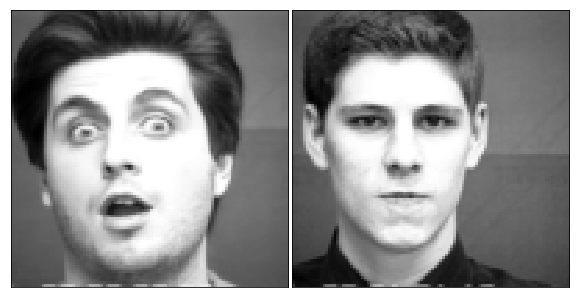

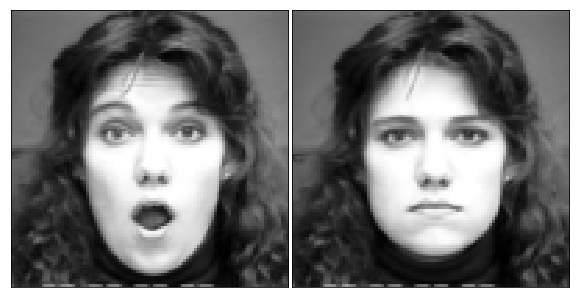

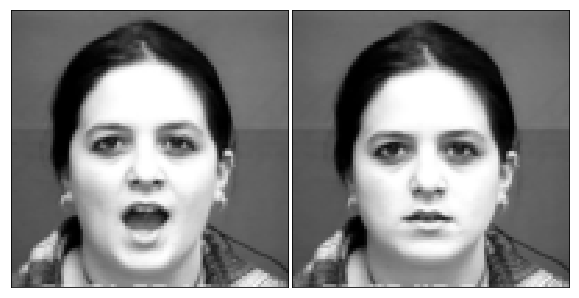

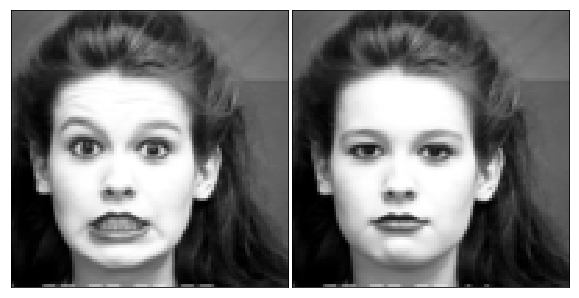

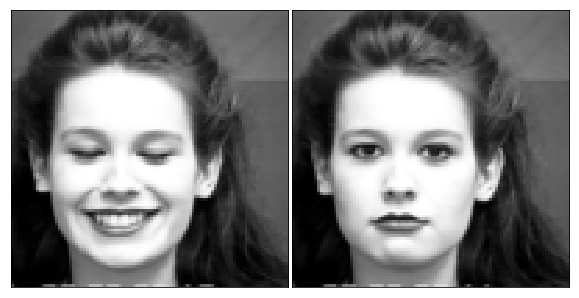

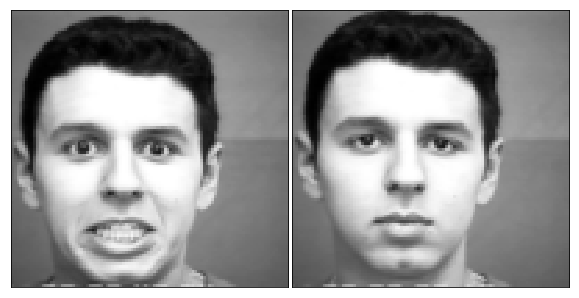

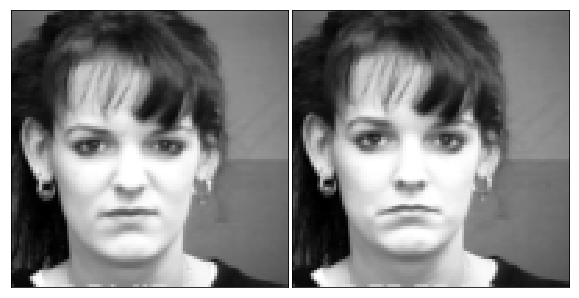

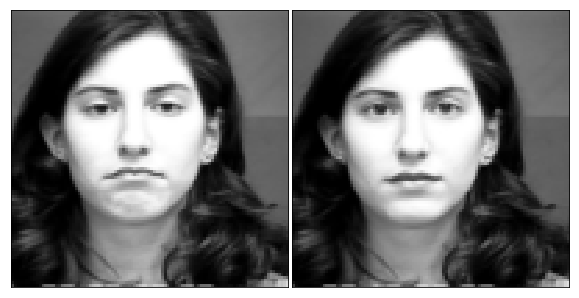

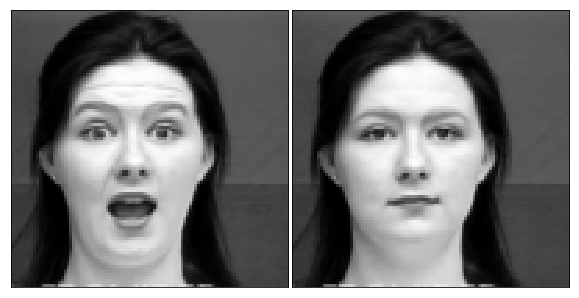

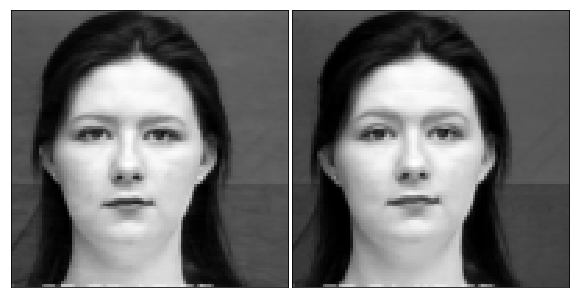

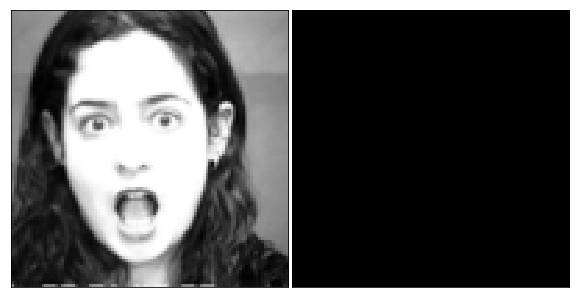

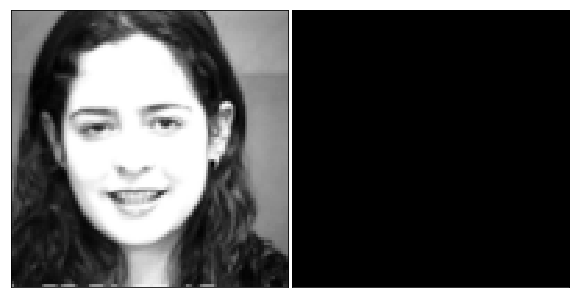

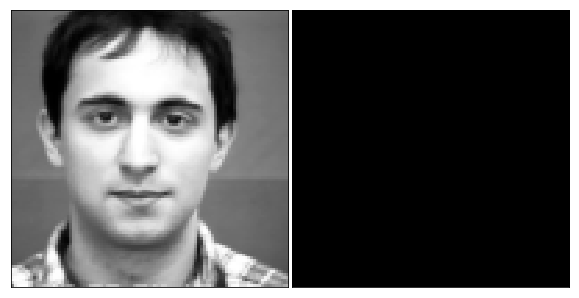

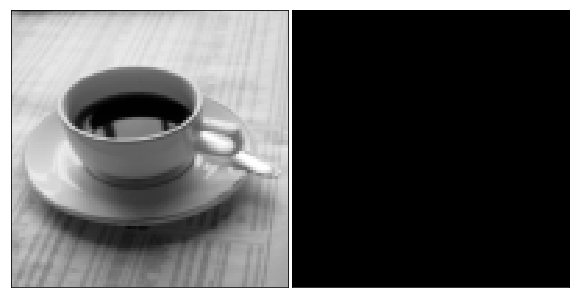

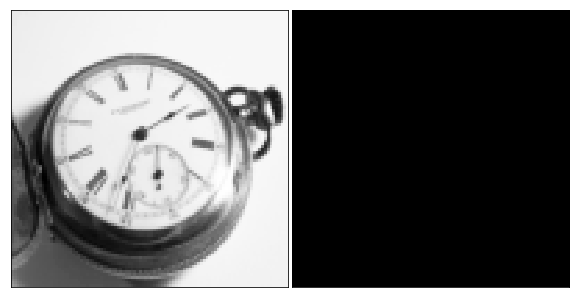

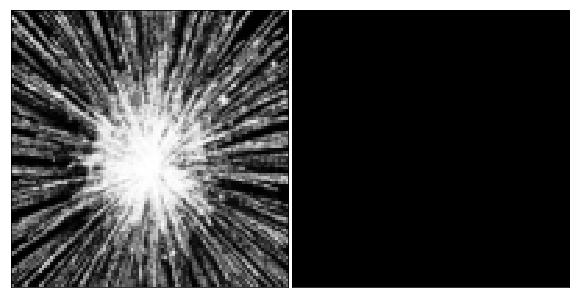

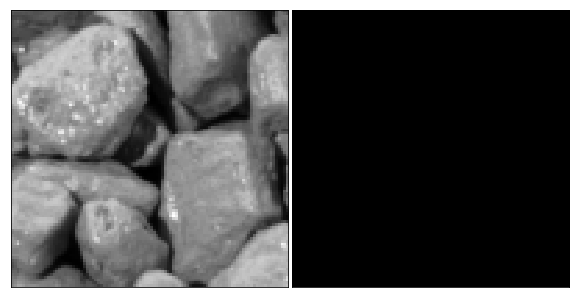

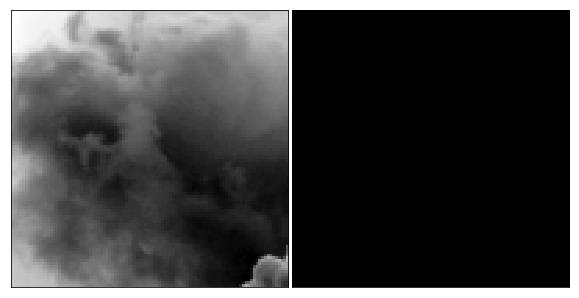

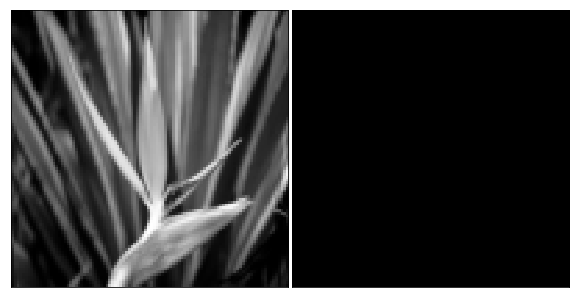

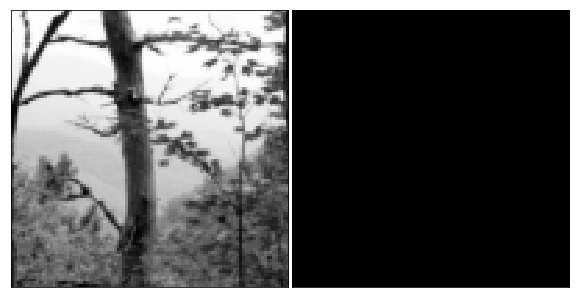

In [9]:
# Finding closest training image using top 5 eigen vectors

k = 5

eigen_faces = np.dot(evecs[0:k], mean_adjusted_images)
weights = np.dot(mean_adjusted_images, eigen_faces.T)

test_images_matrix = load_images(path_to_test, test_images_matrix, num_of_test_imgs)
mean_adjusted_test_imgs = test_images_matrix - mean_face
new_weights = np.dot(mean_adjusted_test_imgs, eigen_faces.T)

threshold = 2000

min_distance_indices = np.zeros(num_of_test_imgs, dtype='uint8')
non_faces_indices = []
for j in range(len(new_weights)):
    new_w = new_weights[j]
    distances = np.zeros(num_of_imgs)
    for i in range(len(weights)):
        old_w = weights[i]
        distances[i] = np.sqrt(np.sum(np.square(new_w-old_w)))

    min_index = np.argmin(distances)

    min_distance_indices[j] = min_index
    if distances[min_index] > threshold:
        non_faces_indices.append(j)
display_images_pairs(test_images_matrix, train_images_matrix[min_distance_indices], non_faces_indices)

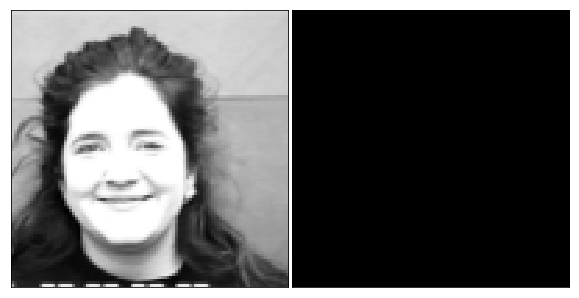

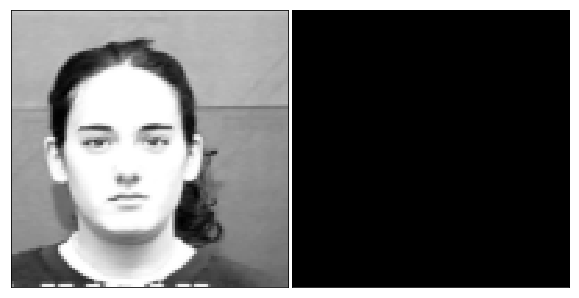

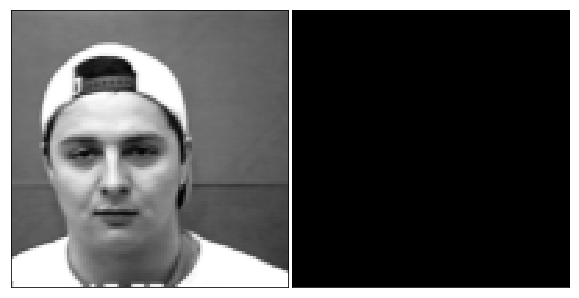

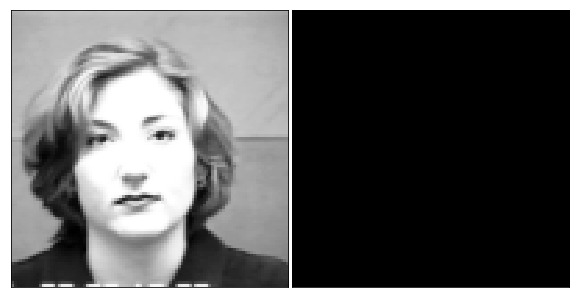

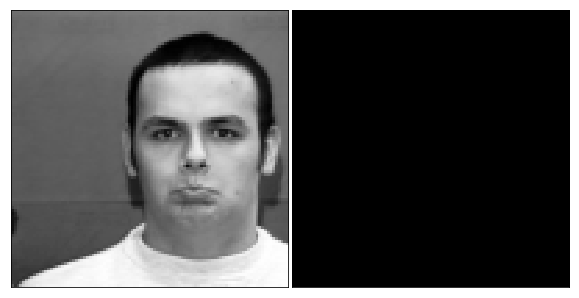

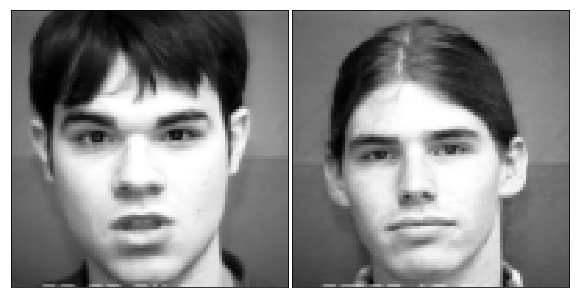

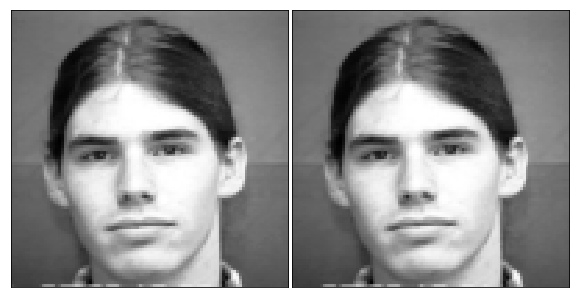

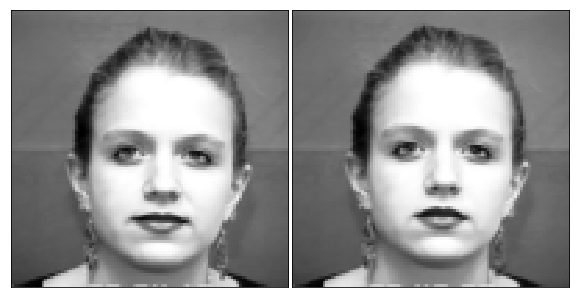

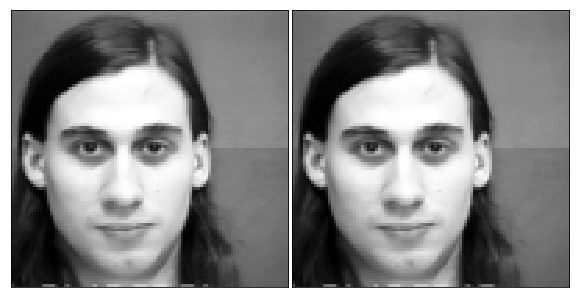

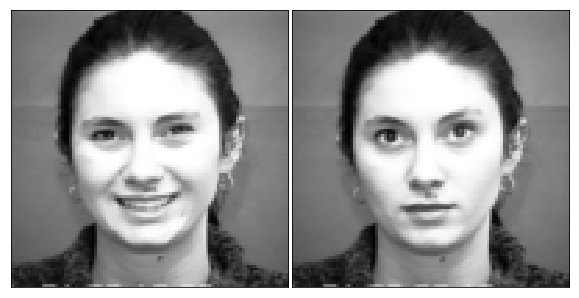

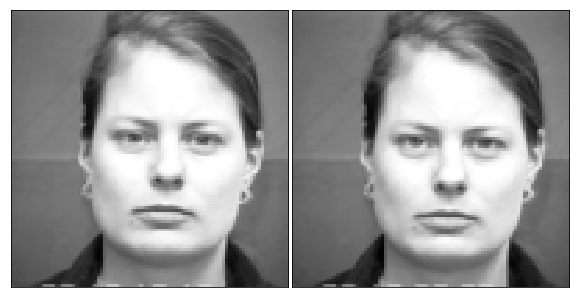

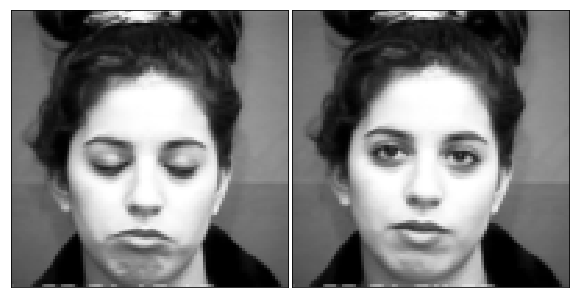

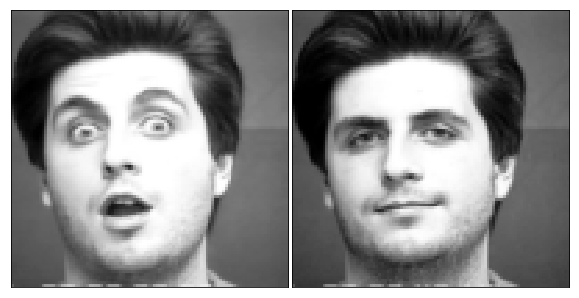

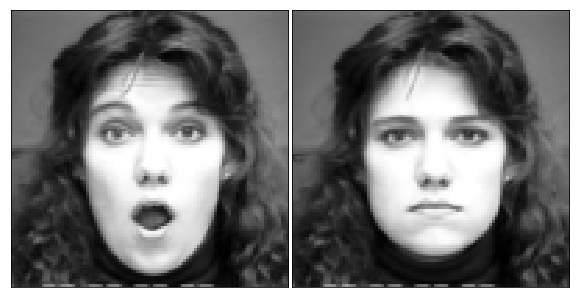

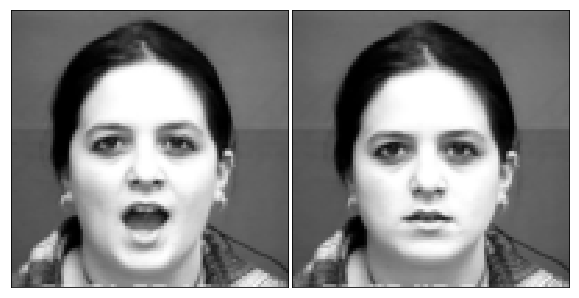

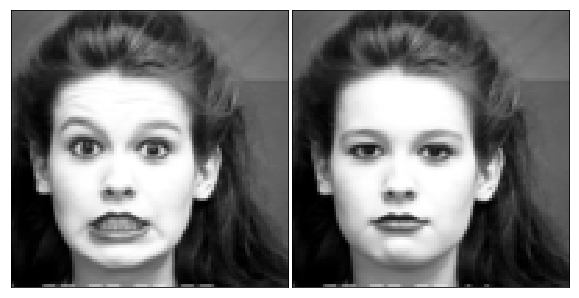

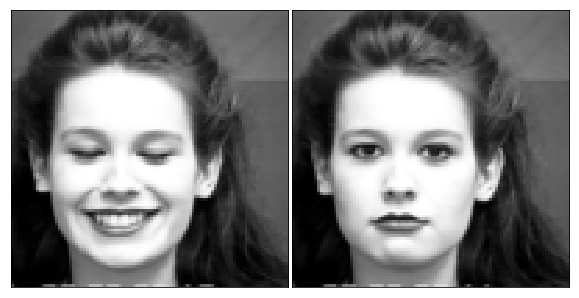

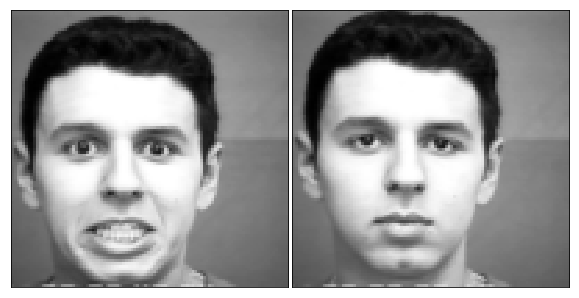

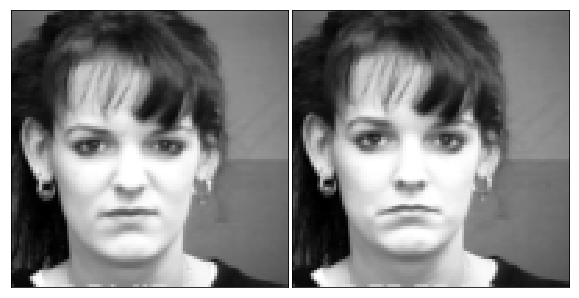

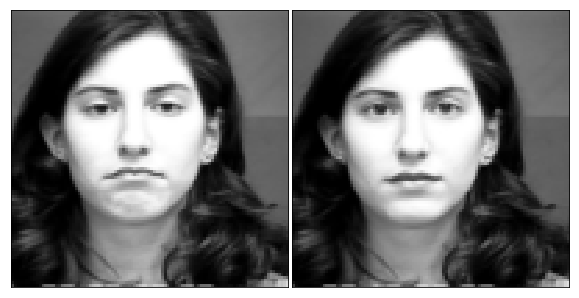

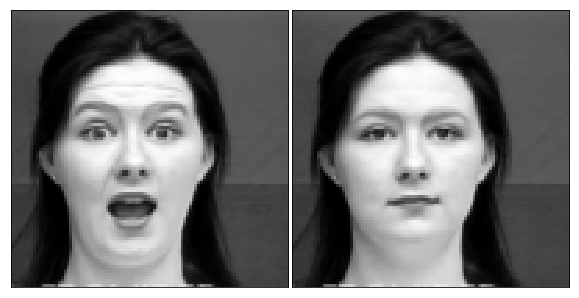

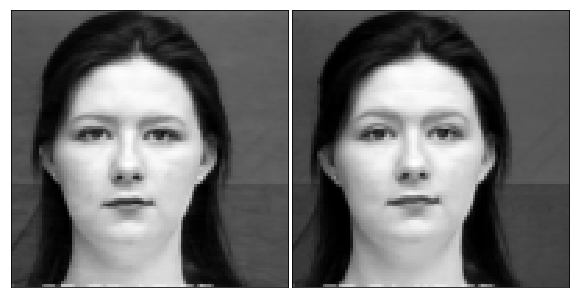

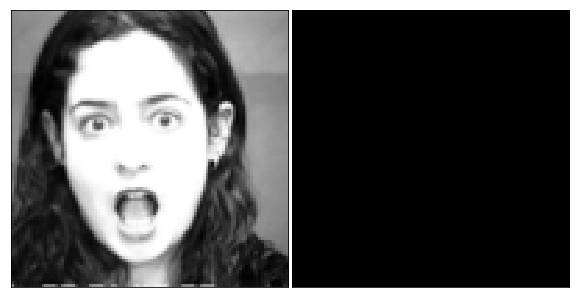

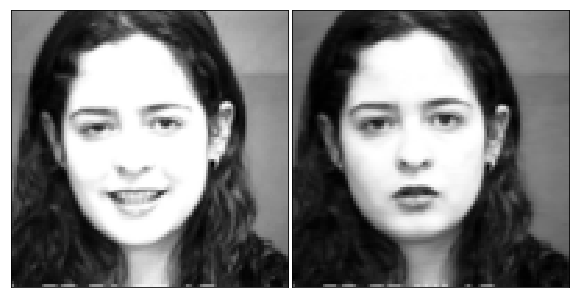

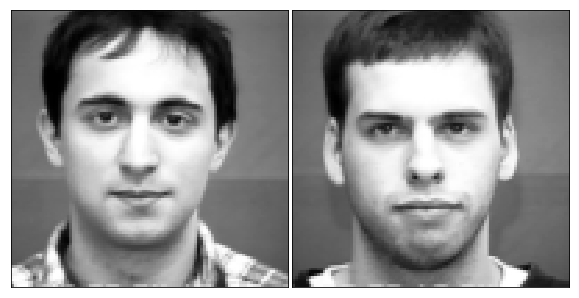

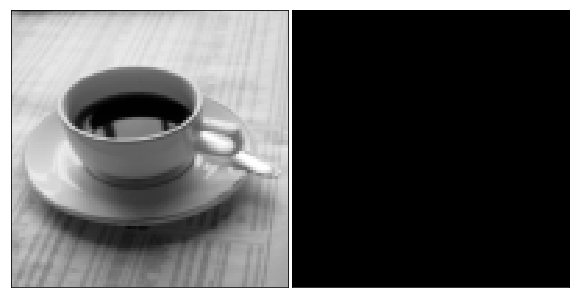

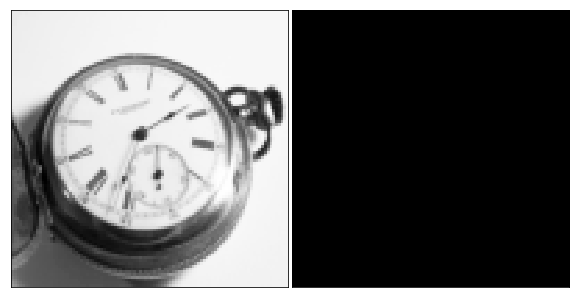

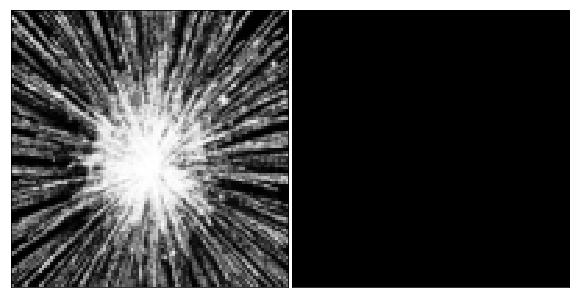

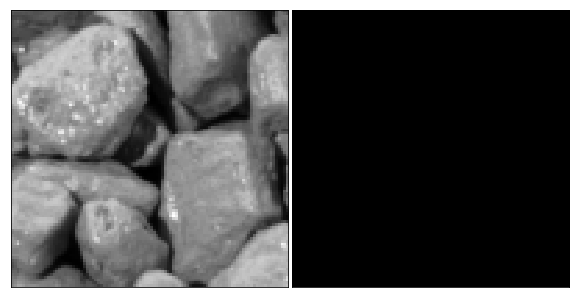

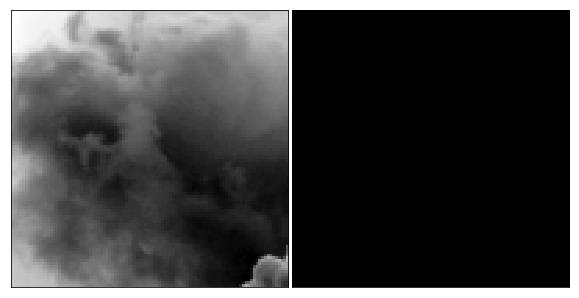

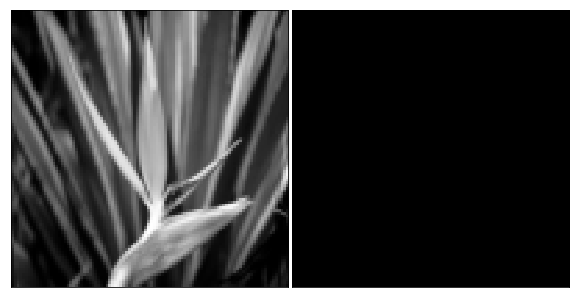

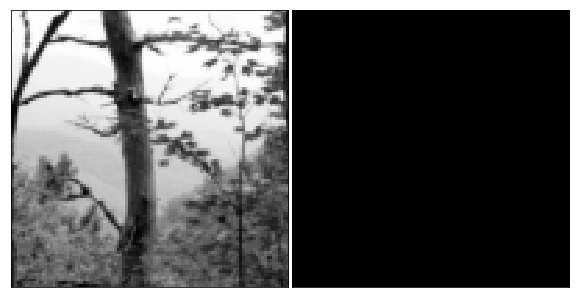

In [10]:
# Finding closest training image using top 15 eigen vectors

k = 15

eigen_faces = np.dot(evecs[0:k], mean_adjusted_images)
weights = np.dot(mean_adjusted_images, eigen_faces.T)

test_images_matrix = load_images(path_to_test, test_images_matrix, num_of_test_imgs)
mean_adjusted_test_imgs = test_images_matrix - mean_face
new_weights = np.dot(mean_adjusted_test_imgs, eigen_faces.T)

threshold = 5000

min_distance_indices = np.zeros(num_of_test_imgs, dtype='uint8')
non_faces_indices = []
for j in range(len(new_weights)):
    new_w = new_weights[j]
    distances = np.zeros(num_of_imgs)
    for i in range(len(weights)):
        old_w = weights[i]
        distances[i] = np.sqrt(np.sum(np.square(new_w-old_w)))

    min_index = np.argmin(distances)

    min_distance_indices[j] = min_index
    if distances[min_index] > threshold:
        non_faces_indices.append(j)
display_images_pairs(test_images_matrix, train_images_matrix[min_distance_indices], non_faces_indices)

# Task 4

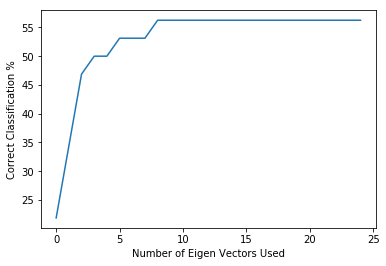

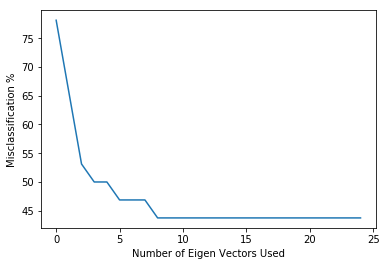

Number of misclassified : 14 out of 32


In [18]:
# Plotting the percent classification error and misclassification error rate as a function of k
# where k is eigen vectors 1 to 25

classification = np.zeros(num_of_imgs)
misclassification = np.zeros(num_of_imgs)

for k in range(25):
    correct_classified = 0
    misclassified = 0
    
    eigen_faces = np.dot(evecs[:k+1], mean_adjusted_images)
    new_weights = np.dot(mean_adjusted_test_imgs, eigen_faces.T)
    old_weights = np.dot(mean_adjusted_images, eigen_faces.T)

    for j in range(len(new_weights)):
        new_w = new_weights[j]
        distances = np.zeros(num_of_imgs)

        for i in range(len(old_weights)):
            old_w = old_weights[i]
            distances[i] = np.sqrt(np.sum(np.square(new_w-old_w)))

        min_index = np.argmin(distances)

        if training_labels[min_index] == testing_labels[j]:
            correct_classified += 1
        else:
            misclassified += 1
            
    classification[k] = (correct_classified/num_of_test_imgs) * 100
    misclassification[k] = (misclassified/num_of_test_imgs) * 100
    
plt.plot(classification)
plt.xlabel('Number of Eigen Vectors Used')
plt.ylabel('Correct Classification %')

plt.show()

plt.plot(misclassification)
plt.xlabel('Number of Eigen Vectors Used')
plt.ylabel('Misclassification %')

plt.show()

print("Number of misclassified :", misclassified, "out of", num_of_test_imgs)